<a href="https://colab.research.google.com/github/643020514-7/643020514-7/blob/main/Project1_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="300">

## Due Date: Sunday, October 1, 2023
<br>
<span style="color:red">NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!</span>

## List team members:

1. <Name> <ID> <Email>
2. <Name> <ID> <Email>
3. <Name> <ID> <Email>

**NOTE1**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost

**NOTE2**: Create a slide presentation once finished, convert to pdf format, and turn in by one group member only
<br>A list of documents to turn in: 1) Jupyter notebook containing results and 2) A set of slides in pdf format

In [ ]:
!pip3 install wordcloud

In [ ]:
!pip3 install twitter-scraper-selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=b84a65cd65b625504077ea5ab2b68651a73a9056d45e2159060272ae4897a963
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4e

In [ ]:
# Load these libraries
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Problem 1: Working with Twitter Data and JSON file

We are working with a Twitter dataset in JSON format from `thailand_tweets.txt`.<br>
The tweets were scraped using "Thailand" keyword on August 31, 2022.<br>
We are going to examine the dataset and retrieve information from the JSON file.
Most Twitter datasets provide only Tweet ID where we can retrieve tweets from tweet ID as follow.
```
twitter.com/anyuser/status/<tweet_id>
```

#### Read JSON file

In [ ]:
# read the file


In [ ]:
file = open('/content/drive/MyDrive/python warehouse/thailand_tweets.txt','r') # rename
foo = file.read()
d = json.loads(foo)

In [ ]:
# inspect the file
thai_tweets  = json.loads(d)
thai_tweets

{'1564764893038882816': {'tweet_id': '1564764893038882816',
  'username': 'matthunter',
  'name': 'MATT HUNTΞR',
  'profile_picture': 'https://twitter.com/matthunter/photo',
  'replies': 2,
  'retweets': 1,
  'likes': 7,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:57+00:00',
  'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
  'hashtags': [],
  'mentions': [],
  'images': [],
  'videos': [],
  'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
  'link': ''},
 '1564764866598080513': {'tweet_id': '1564764866598080513',
  'username': 'DavSmithVP',
  'name': 'DavSmith / Virtual Photography',
  'profile_picture': 'https://twitter.com/DavSmithVP/photo',
  'replies': 0,
  'retweets': 0,
  'likes': 2,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:50+00:00',
  'content': 'Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics',
  'hashtags': ['Virtua

#### Pretty print json/dict object

Possible approaches:
* In fact, `pandas` has `pandas.read_json(<file_dir>)` function to read json file into dataframe
* As we create a data dict, we can also read our data dict into a pandas dataframe

### Your report
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
    * You are free to define your own popularity metric
* Display the top 5 tweets that are the most popular among your collection
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

##The total number of tweets collected in the file:

In [ ]:
len(set(thai_tweets)) #how to 1

29

In [ ]:
all_key = list(thai_tweets.keys())[:]  #how to 2

num_all_key = len(all_key)
print(f'จำนวนtweetsทั้งหมดคือ',num_all_key)

จำนวนtweetsทั้งหมดคือ 29


##The content of the first tweet:

In [ ]:
first_key = list(thai_tweets.keys())[0]  #
first_content = thai_tweets[first_key]['content']

print(f'contentแรก คือ:',first_content)

contentแรก คือ: Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 


##Is the first tweet contained any hashtags or mentions?

In [ ]:
first = thai_tweets[first_key]
keys=['hashtags','mentions']                      ### ทดสอบ ###

hm = list( map(first.get, keys) )


if not any(isinstance(item, str) for item in hm):
    print("empty")
else:
    print("ืnot empty")



empty


In [ ]:

# tweet แรกพร้อม hashtags และ mentions
first_tweet_id = next(iter(thai_tweets))
first_tweet_name = thai_tweets[first_tweet_id]['name']
first_tweet_username = thai_tweets[first_tweet_id]['username']
first_tweet_hashtags = thai_tweets[first_tweet_id]['hashtags']
first_tweet_mentions = thai_tweets[first_tweet_id]['mentions']
first_tweet_content = thai_tweets[first_tweet_id]['content']

print("Username:", (first_tweet_username))
print("name:", (first_tweet_name))
print("ในเนื้อหา:", (first_tweet_content))
# ตรวจสอบว่าทวีตแรกมี hashtags และ mentionsไหม และ print ออกมา
if first_tweet_hashtags:
    print("Hashtags:", ', '.join(first_tweet_hashtags))
else:
    print("ไม่มีแฮชแท็กในทวีตนี้.")

if first_tweet_mentions:
    print("Mentions:", ', '.join(first_tweet_mentions))
else:
    print("ไม่มีการกล่าวถึงในทวีตนี้.")


Username: matthunter
name: MATT HUNTΞR
ในเนื้อหา: Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 
ไม่มีแฮชแท็กในทวีตนี้.
ไม่มีการกล่าวถึงในทวีตนี้.


##Collect all hashtags related to Thailand from this data

In [ ]:
thailand_hashtags_data = []


for tweet_id, tweet_data in thai_tweets.items():
    content = tweet_data['content']
    hashtags = [tag.strip('#') for tag in content.split() if tag.startswith('#')]


    thailand_hashtags = [tag for tag in hashtags if 'thailand' in tag.lower()]


    thailand_hashtags_data.extend(thailand_hashtags)


thailand__hashtags = list(set(thailand_hashtags_data))


print(f'แฮชแท็กทั้งหมดที่เกี่ยวข้องกับประเทศไทยคือ:',thailand_hashtags_data)

แฮชแท็กทั้งหมดที่เกี่ยวข้องกับประเทศไทยคือ: ['thailand', 'Thailand']


##Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
* You are free to define your own popularity metric

In [ ]:
most_retweeted_tweet = None
most_liked_tweet = None

for tweet_id, data in thai_tweets.items():

    replies = data.get('replies', 0)
    retweets = data.get('retweets', 0)
    likes = data.get('likes', 0)
    username = data.get('username',0)


    if most_retweeted_tweet is None or retweets > most_retweeted_tweet['retweets']:
        most_retweeted_tweet = {'tweet_id': tweet_id, 'retweets': retweets,'username':username}



    if most_liked_tweet is None or likes > most_liked_tweet['likes']:
        most_liked_tweet = {'tweet_id': tweet_id, 'likes': likes,'username': username}


print("Tweet ที่มี Retweet มากที่สุดคือของ:",most_retweeted_tweet['username'],"มียอด Retweet",most_retweeted_tweet['retweets'])
print("Tweet ที่มี Like มากที่สุดคือของ:",most_liked_tweet['username'],"มียอด Like",most_liked_tweet['likes'])

Tweet ที่มี Retweet มากที่สุดคือของ: OhmPawatInter มียอด Retweet 99
Tweet ที่มี Like มากที่สุดคือของ: OhmPawatInter มียอด Like 143


##Display the top 5 tweets that are the most popular among your collection

In [ ]:
sorted_tweets = sorted(thai_tweets.values(), key=lambda x: x['likes'], reverse=True)

# top 5 tweets
top_5_tweets = sorted_tweets[:5]
for i, tweet in enumerate(top_5_tweets, start=1):
    print(f"Top {i} Tweet:")
    print(f"Username: {tweet['username']}")
    print(f"Likes: {tweet['likes']}")
    print(f"Content: {tweet['content']}")
    print(f"Tweet URL: {tweet['tweet_url']}")
    print("-" * 95)


Top 1 Tweet:
Username: OhmPawatInter
Likes: 143
Content: Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 top tweets
25182 retweets

https://etrenders.com/trendsetters/Thailand…
#ohmpawat #ยิ้ม5พันของโอมภวัต
Tweet URL: https://twitter.com/OhmPawatInter/status/1564764445825458181
-----------------------------------------------------------------------------------------------
Top 2 Tweet:
Username: Zeepruk_jfc
Likes: 32
Content: Can you help me?

tracking number
FMP200001150XX

Does anyone know a shipping company in Thailand that handles this number?
I'm in trouble with no reply even if I contact the caller 

#Zunshine
Tweet URL: https://twitter.com/Zeepruk_jfc/status/1564762341324992513
-----------------------------------------------------------------------------------------------
Top 3 Tweet:
Username: nato_tonyo11
Likes: 18
Content: Good morning  world! And goodmorning to you too #DonnyPangilinan, enjoy Thailand babe and please d

##Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

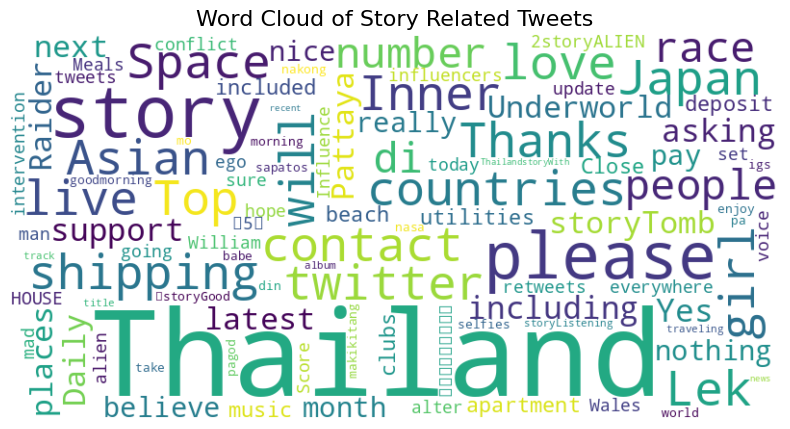

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


tweet_texts = [tweet['content'] for tweet in thai_tweets.values()]

# รวมข้อความtweetทั้งหมดไว้ในสตริงเดียว
combined_text = 'story'.join(tweet_texts)

# ลบ URL ,@ และแฮชแท็ก
combined_text = re.sub(r'http\S+|@\w+|#\w+', '', combined_text)

# สร้าง worldcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(combined_text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Story Related Tweets', fontsize=16)
plt.axis('off')
plt.show()


Note: ไม่ต้องรายงานส่วนนี้ในสไลด์

## Problem 2 Study Trip Advisor Hotel Reviews Sentiment

We are working with the Trip Advisor Hotel Reviews dataset. You can see the source from https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews.

* Analyze the data to find out what make a hotel good or bad
<br>You may create a tag of "positive", "negative", or "neural" sentiment first. After tagging each tweet with different sentiment, we can separate positive tweets and negative tweets. Then, it is easier to find our common patterns in positive tweets or good hotels, and vice versa.

#----------------------------------------------
##Your code starts here
- label each tweet as positive, negative, and neural sentiment
- combine tweet texts in each type
- tokenize texts
- convert to lower case
- remove stop words
- remove any other stop words, like RT
- remove punctuations
- remove other symbols?
- analyze word frequency in each sentiment type and so on
- create some data visualization for the analysis and your presentation

#Start

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
hotel = pd.read_csv('/content/drive/MyDrive/python warehouse/tripadvisor_hotel_reviews.csv')

In [ ]:
hotel.columns

Index(['Review', 'Rating'], dtype='object')

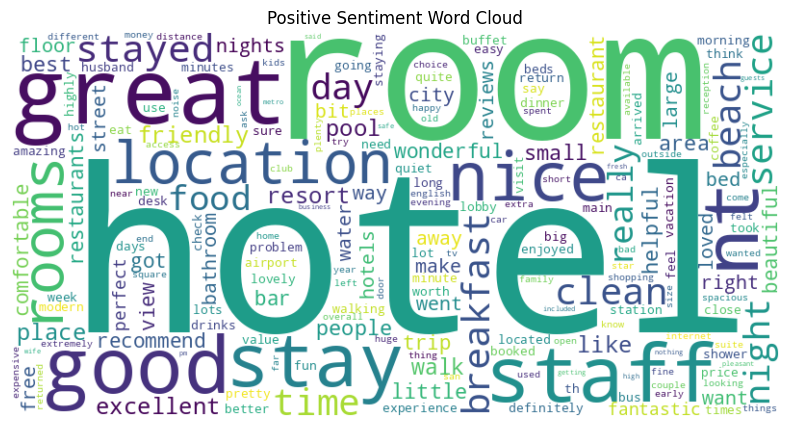

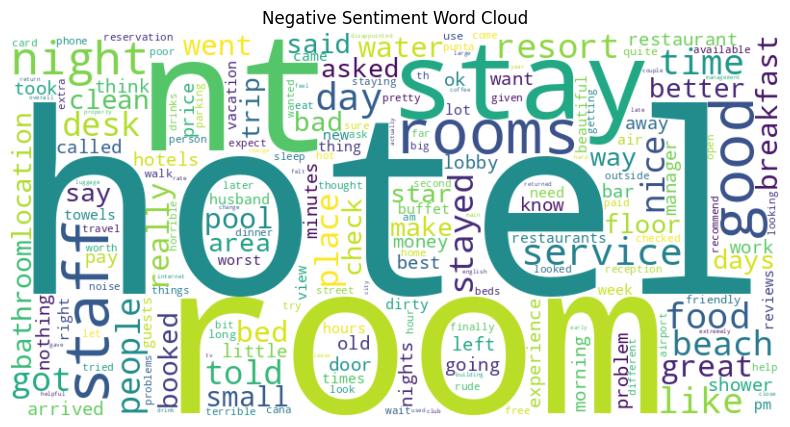

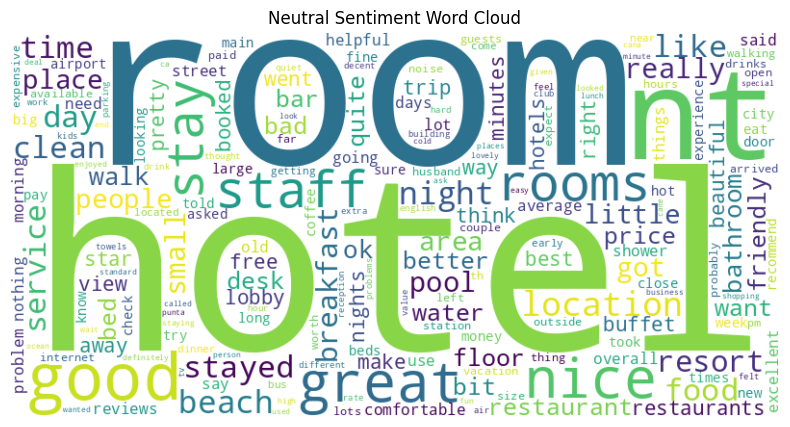

In [ ]:
#สร้าง reviews,ratings
reviews = hotel['Review']
ratings = hotel['Rating']

# สร้าง DataFrame
df_test = pd.DataFrame({'Review': reviews, 'Rating': ratings})

# Label each review as Positive, Negative, or Neutral based on the Rating (กำกับการให้คะแนนโดยมี positive,negative,neutral)
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df_test['Sentiment'] = df_test['Rating'].apply(label_sentiment)

# ทำการรวมข้อความของแค่ละreviews คือ positive,negative,neutral
positive_reviews = " ".join(df_test[df_test['Sentiment'] == 'Positive']['Review'])
negative_reviews = " ".join(df_test[df_test['Sentiment'] == 'Negative']['Review'])
neutral_reviews = " ".join(df_test[df_test['Sentiment'] == 'Neutral']['Review'])

# Tokenization, lowercase conversion, and removing stopwords, RT, จัดการเครื่องหมายต่างๆ
def preprocess_test(text):
    # Tokenization
    words = nltk.word_tokenize(text)

    # Convert to lowercase
    words = [word.lower() for word in words]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    #  จัดการเครื่องหมายใน
    words = [re.sub(r'^RT$|[^a-zA-Z]', '', word) for word in words]

    return " ".join(words)

positive_test = preprocess_test(positive_reviews)
negative_test = preprocess_test(negative_reviews)
neutral_test = preprocess_test(neutral_reviews)

# การหาความถี่ของคำ
def word_frequency(text):
    words = nltk.word_tokenize(text)
    freq_dist = nltk.FreqDist(words)
    return freq_dist

positive_freq_test = word_frequency(positive_test)
negative_freq_test = word_frequency(negative_test)
neutral_freq_test = word_frequency(neutral_test)

# Visualization: สร้าง Word Cloud
def generate_word_cloud(freq_dist, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_word_cloud(positive_freq_test, 'Positive Sentiment Word Cloud')
generate_word_cloud(negative_freq_test, 'Negative Sentiment Word Cloud')
generate_word_cloud(neutral_freq_test, 'Neutral Sentiment Word Cloud')



#Finals

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')










[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

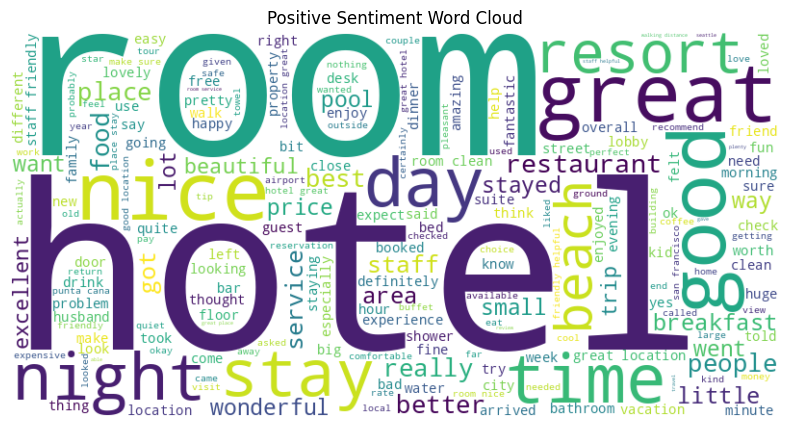

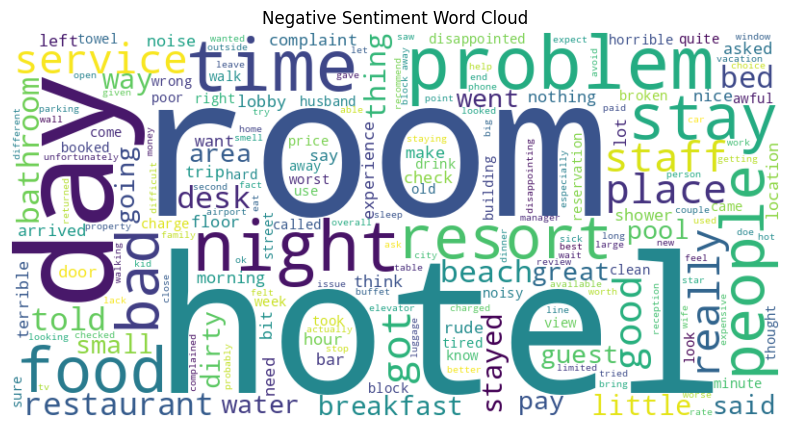

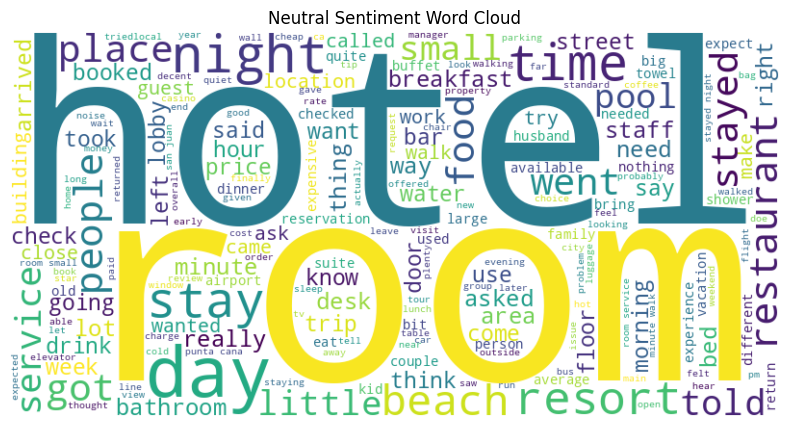

In [ ]:

#สร้าง reviews,ratings
reviews = hotel['Review']
ratings = hotel['Rating']

# สร้าง DataFrame
df = pd.DataFrame({'Review': reviews, 'Rating': ratings})

# Label each review as Positive, Negative, or Neutral based on the Rating (กำกับการให้คะแนนโดยมี positive,negative,neutral)
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Rating'].apply(label_sentiment)


# ทำการรวมข้อความของแค่ละreviews คือ positive,negative,neutral
positive_reviews_a = " ".join(df[df['Sentiment'] == 'Positive']['Review'])
negative_reviews_a = " ".join(df[df['Sentiment'] == 'Negative']['Review'])
neutral_reviews_a = " ".join(df[df['Sentiment'] == 'Neutral']['Review'])

# Split the text data into individual reviews based on ','
aa = positive_reviews_a.split(',')
bb = negative_reviews_a.split(',')
cc = neutral_reviews_a.split(',')
# Create a DataFrame with 'Review' column
df_pos = pd.DataFrame({'Review': aa})
df_neg = pd.DataFrame({'Review': bb})
df_neu = pd.DataFrame({'Review': cc})


positive_reviews = []
negative_reviews = []
neutral_reviews = []

sid = SentimentIntensityAnalyzer()

# Zip the three DataFrames together
for review1, review2, review3 in zip(df_pos['Review'], df_neg['Review'],df_neu['Review']):
    # Perform sentiment analysis on each review
    sentiment_scores1 = sid.polarity_scores(review1)
    sentiment_scores2 = sid.polarity_scores(review2)
    sentiment_scores3 = sid.polarity_scores(review3)

    compound_score1 = sentiment_scores1['compound']
    compound_score2 = sentiment_scores2['compound']
    compound_score3 = sentiment_scores3['compound']

    # Combine positive reviews from all three DataFrames
    if compound_score1 >= 0.1:
        positive_reviews.append(review1)
    if compound_score2 >= 0.1:
        positive_reviews.append(review2)
    if compound_score3 >= 0.1:
        positive_reviews.append(review3)

    # Combine negative reviews from all three DataFrames
    if compound_score1 <= -0.1:
        negative_reviews.append(review1)
    if compound_score2 <= -0.1:
        negative_reviews.append(review2)
    if compound_score3 <= -0.1:
        negative_reviews.append(review3)

    # Combine neutral reviews from all three DataFrames
    if -0.1 < compound_score1 < 0.1:
        neutral_reviews.append(review1)
    if -0.1 < compound_score2 < 0.1:
        neutral_reviews.append(review2)
    if -0.1 < compound_score3 < 0.1:
        neutral_reviews.append(review3)


# Create a WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

#  lemmatize text
def preprocess_and_lemmatize(text):
    # Tokenization
    words = nltk.word_tokenize(text)

    # Lemmatization
    words = [lemmatizer.lemmatize(word.lower()) for word in words]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # ลบอักขระที่ไม่ใช่ตัวอักษร
    words = [re.sub(r'[^a-zA-Z]', '', word) for word in words if word.isalpha()]

    return " ".join(words)

# Apply preprocessing and lemmatization to reviews
positive_reviews = [preprocess_and_lemmatize(review) for review in positive_reviews]
negative_reviews = [preprocess_and_lemmatize(review) for review in negative_reviews]
neutral_reviews = [preprocess_and_lemmatize(review) for review in neutral_reviews]

# การหาความถี่ของคำ
def word_frequency(text):
    words = nltk.word_tokenize(text)
    freq_dist = nltk.FreqDist(words)
    return freq_dist

positive_freq_dist = word_frequency(" ".join(positive_reviews))
negative_freq_dist = word_frequency(" ".join(negative_reviews))
neutral_freq_dist = word_frequency(" ".join(neutral_reviews))


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# generate a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for positive, negative, and neutral reviews
generate_word_cloud(" ".join(positive_reviews), 'Positive Sentiment Word Cloud')
generate_word_cloud(" ".join(negative_reviews), 'Negative Sentiment Word Cloud')
generate_word_cloud(" ".join(neutral_reviews), 'Neutral Sentiment Word Cloud')

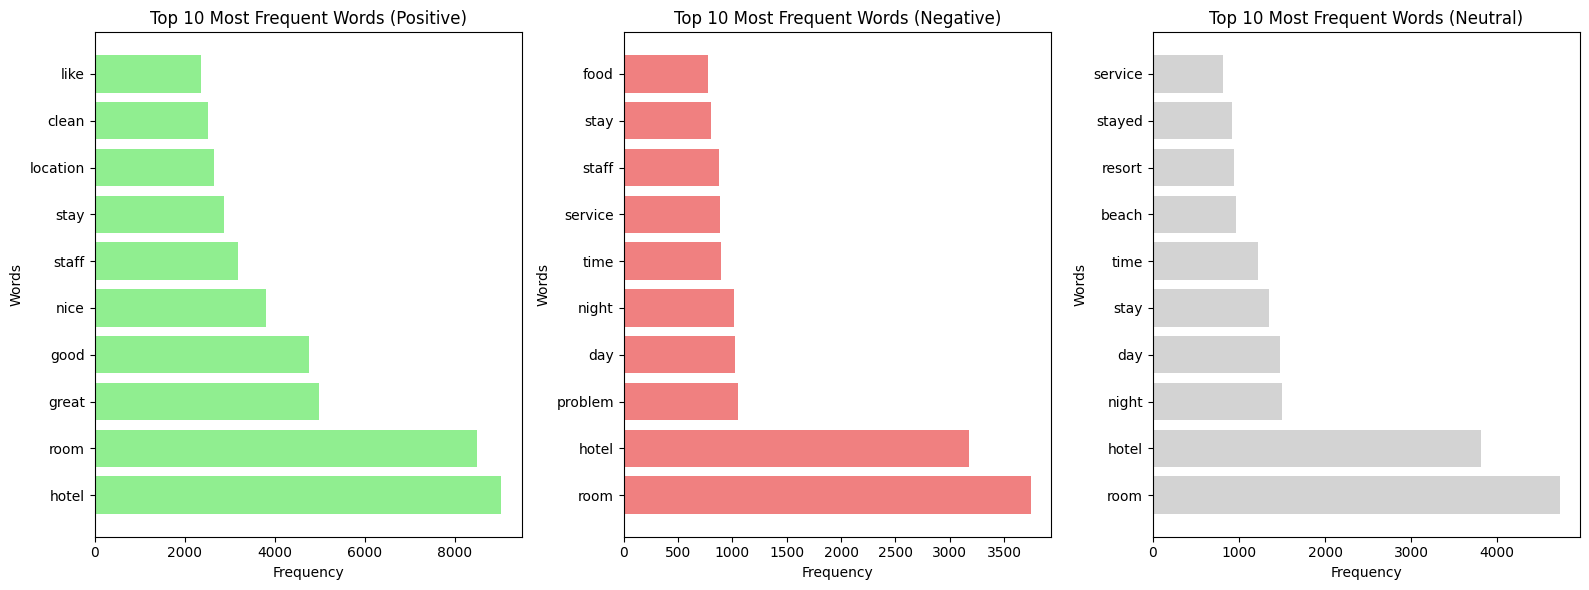

In [ ]:
import matplotlib.pyplot as plt

# Calculate word frequencies for Positive reviews
positive_freq_dist = word_frequency(" ".join(positive_reviews))
top_10_positive = positive_freq_dist.most_common(10)
words_positive, frequencies_positive = zip(*top_10_positive)

# Calculate word frequencies for Negative reviews
negative_freq_dist = word_frequency(" ".join(negative_reviews))
top_10_negative = negative_freq_dist.most_common(10)
words_negative, frequencies_negative = zip(*top_10_negative)

# Calculate word frequencies for Neutral reviews
neutral_freq_dist = word_frequency(" ".join(neutral_reviews))
top_10_neutral = neutral_freq_dist.most_common(10)
words_neutral, frequencies_neutral = zip(*top_10_neutral)

# Create a bar chart for Positive reviews
plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.barh(words_positive, frequencies_positive, color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words (Positive)')

# Create a bar chart for Negative reviews
plt.subplot(132)
plt.barh(words_negative, frequencies_negative, color='lightcoral')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words (Negative)')

# Create a bar chart for Neutral reviews
plt.subplot(133)
plt.barh(words_neutral, frequencies_neutral, color='lightgray')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words (Neutral)')

plt.tight_layout()  # Ensure proper spacing
plt.show()


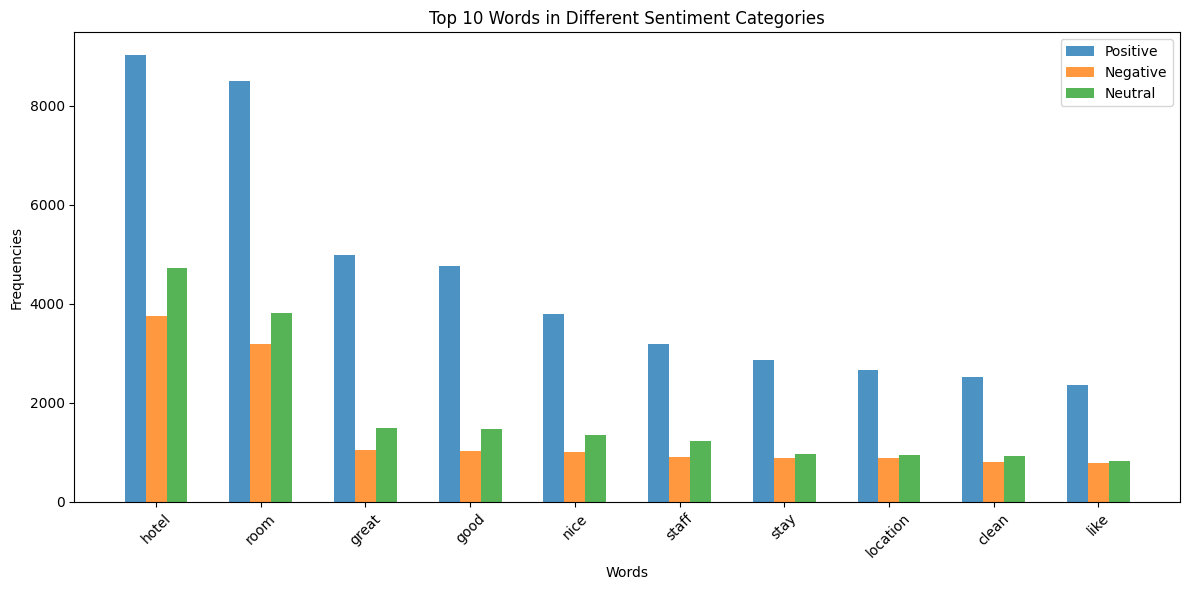

In [ ]:
# Function to generate and display a bar chart for word frequencies
def generate_combined_bar_chart(positive_freq_dist, negative_freq_dist, neutral_freq_dist):
    top_words_positive, frequencies_positive = zip(*positive_freq_dist.most_common(10))  # Top 10 words in Positive Reviews
    top_words_negative, frequencies_negative = zip(*negative_freq_dist.most_common(10))  # Top 10 words in Negative Reviews
    top_words_neutral, frequencies_neutral = zip(*neutral_freq_dist.most_common(10))  # Top 10 words in Neutral Reviews

    # Create a combined bar chart
    bar_width = 0.2
    index = range(len(top_words_positive))

    plt.figure(figsize=(12, 6))
    plt.bar(index, frequencies_positive, bar_width, label='Positive', alpha=0.8)
    plt.bar([i + bar_width for i in index], frequencies_negative, bar_width, label='Negative', alpha=0.8)
    plt.bar([i + 2 * bar_width for i in index], frequencies_neutral, bar_width, label='Neutral', alpha=0.8)

    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.title('Top 10 Words in Different Sentiment Categories')
    plt.xticks([i + bar_width for i in index], top_words_positive, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate and display a combined bar chart for word frequencies in different sentiment categories
generate_combined_bar_chart(positive_freq_dist, negative_freq_dist, neutral_freq_dist)


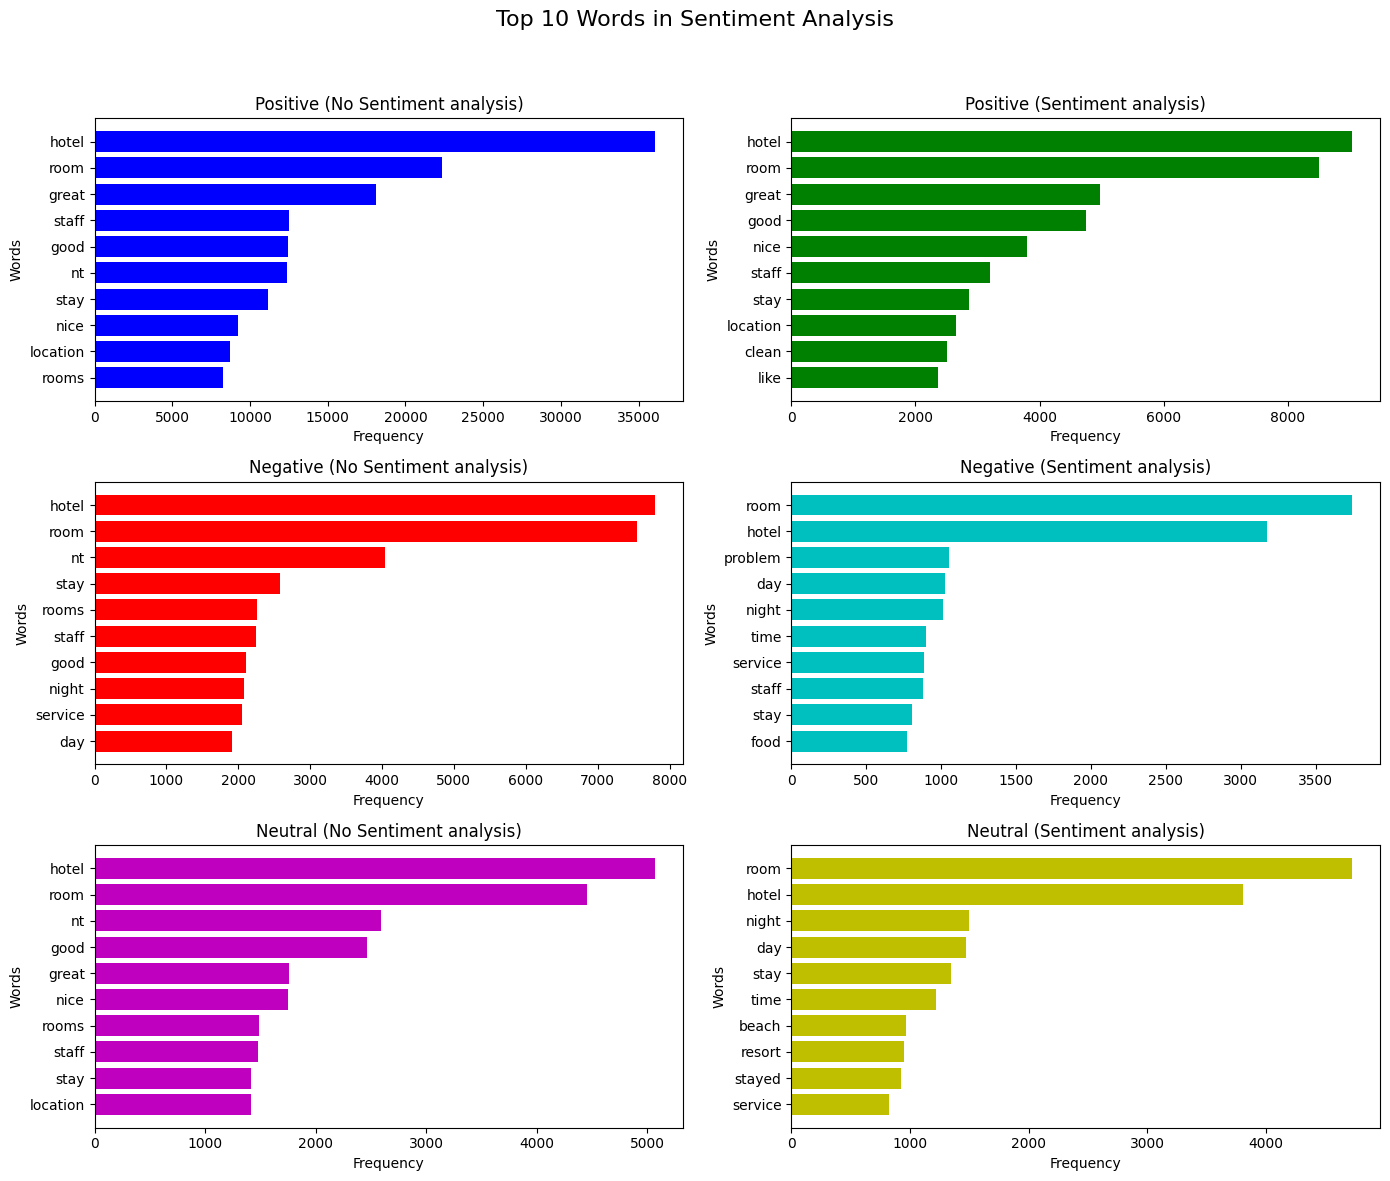

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the categories and colors
categories = ['Positive (No Sentiment analysis)','Positive (Sentiment analysis)', 'Negative (No Sentiment analysis)','Negative (Sentiment analysis)', 'Neutral (No Sentiment analysis)',   'Neutral (Sentiment analysis)']
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Define the data for each category
data = [
    positive_freq_test.most_common(10),
    positive_freq_dist.most_common(10),
    negative_freq_test.most_common(10),
    negative_freq_dist.most_common(10),
    neutral_freq_test.most_common(10),
    neutral_freq_dist.most_common(10)
]

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Top 10 Words in Sentiment Analysis', fontsize=16)

for i in range(len(categories)):
    ax = axs[i // 2, i % 2]
    words, counts = zip(*data[i])
    ax.barh(words, counts, color=colors[i])
    ax.set_xlabel('Frequency')
    ax.set_title(categories[i])
    ax.invert_yaxis()  # Invert the y-axis for better readability

# Set y-axis labels
for ax in axs.flat:
    ax.set(ylabel='Words')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#Step 1 - Import Libraries and Load Data

#Step 2 - Create DataFrame and Label Sentiments

#Step 3 - Combine Reviews by Sentiment

#Step 4 - Tokenization and Preprocessing

#Step 5 - Sentiment Analysis and Separation by Sentiment

#Step 6 - Lemmatization and Word Frequency

### Report
* How did you analyze the data?
* What did you find in the data? (please include figures or tables in the report, but no source code)

## Problem 3 Collect and Analyze Your Interesting Topic

* Select a topic that your group members are interested
* Gather url from at least 3 webpages
* Use urllib.request to retrieve data from webpage
* Clean and find intersting patterns and information
* Create a word cloud of your topic

In [ ]:
#----------------------------------------------
# Your code starts here



In [35]:
import urllib.request

# Create a Request object for the webpage you want to retrieve.
request = urllib.request.Request("https://en.wikipedia.org/wiki/Galaxy")

# Open the Request object using the urlopen() function.
response = urllib.request.urlopen(request)

# Read the response data using the read() method.
data = response.read()

# Close the response object using the close() method.
response.close()

# Print the contents of the webpage.
print(data)


b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Galaxy - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vecto

In [68]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the 'punkt' tokenizer data and stopwords (only need to do this once)
nltk.download('punkt')
nltk.download('stopwords')

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(data, 'html.parser')

# Find and extract specific elements from the webpage
# For example, let's extract and print the page title:
page_title = soup.title.string
print("Page Title:", page_title)

# Find and extract all paragraphs from the webpage
paragraphs = soup.find_all('p')

# Initialize a list to store the cleaned text
cleaned_text = []

# Iterate through the paragraphs
for paragraph in paragraphs:
    # Tokenize the paragraph into words
    words = word_tokenize(paragraph.text)

    # Get the list of English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)

    # Append the cleaned text to the list
    cleaned_text.append(filtered_text)

# Join the cleaned text paragraphs into a single string
final_cleaned_text = ' '.join(cleaned_text)

# Print the cleaned text
print("Cleaned Text (Stopwords Removed):", final_cleaned_text)





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Page Title: Galaxy - Wikipedia
Cleaned Text (Stopwords Removed):  galaxy system stars , stellar remnants , interstellar gas , dust , dark matter bound together gravity . [ 1 ] [ 2 ] word derived Greek galaxias ( γαλαξίας ) , literally 'milky ' , reference Milky Way galaxy contains Solar System . Galaxies , averaging estimated 100 million stars , [ 3 ] range size dwarfs less hundred million stars , largest galaxies known – supergiants one hundred trillion stars , orbiting galaxy 's center mass . mass typical galaxy form dark matter , percent mass visible form stars nebulae . Supermassive black holes common feature centres galaxies . Galaxies categorized according visual morphology elliptical , [ 4 ] spiral , irregular . [ 5 ] Many thought supermassive black holes centers . Milky Way 's central black hole , known Sagittarius * , mass four million times greater Sun . [ 6 ] estimated roughly 200 billion galaxies ( 2×1011 ) observable universe . [ 7 ] galaxies 1,000 100,000 parsecs diameter

In [ ]:
import re



# Split the text into words (tokens) using whitespace as the delimiter
words =final_cleaned_text.split()

# Remove non-alphabet characters from each word using regular expressions
words = [re.sub(r'[^a-zA-Z]', '', word) for word in words]

# Print the split words without non-alphabet characters
for word in words:
    if word:  # Check if the word is not empty after removing non-alphabet characters
        print(word)


In [ ]:
from collections import Counter

# Split the text into words (tokens) using whitespace as the delimiter
words = final_cleaned_text.split()

# Remove non-alphabet characters from each word using regular expressions
words = [re.sub(r'[^a-zA-Z]', '', word) for word in words]

# Create a Counter object to count word frequencies
word_freq = Counter(words)

# Print the word frequencies
for word, freq in word_freq.items():
    if word:  # Check if the word is not empty after removing non-alphabet characters
        print(f"Word: {word}, Frequency: {freq}")


In [71]:
pip install wordcloud


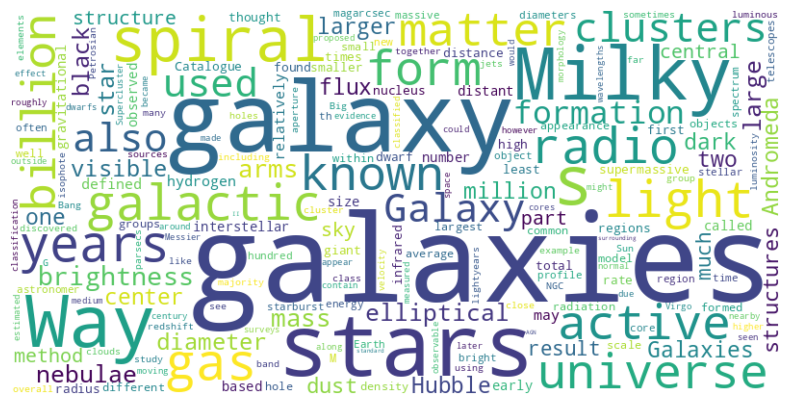

In [72]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you already have the word frequencies in the word_freq dictionary

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud image from the word frequencies
wordcloud.generate_from_frequencies(word_freq)

# Display the word cloud image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()


### Report
* What did you find out about your topic? (please include figures or tables in the report, but no source code)

# ☃️ The End of Project 1 ☃️